Importing Libraries
-

In [584]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


Importing data from WHO
-

In [585]:
data_link= "https://apps.who.int/gho/athena/data/GHO/NCD_BMI_30A?filter=AGEGROUP:*;COUNTRY:*;SEX:*&x-sideaxis=COUNTRY&x-topaxis=YEAR;GHO;AGEGROUP;SEX&profile=crosstable&format=csv"

bmi_dirty=pd.read_csv(data_link)
df_v1=pd.DataFrame(bmi_dirty)

Structuring Data
-

In [586]:
#removing 2 first collums (age, description) and setting country as index
df_v2=df_v1.drop([0,1])
df_v2.set_index("Unnamed: 0",inplace=True)
df_v3=df_v2.T
df_v3.Country=df_v3.Country.astype(str)
df_v3 = df_v3.iloc[::-1]


In [587]:
#Splitting up in 3 separate Dataframes
df_male=df_v3.loc[df_v3.Country == " Male"]

df_female=df_v3.loc[df_v3.Country == " Female"]

df_both=df_v3.loc[df_v3.Country == " Both sexes"]



In [588]:
#Removing Gender Colum and reindexing
df_both=df_v3.loc[df_v3.Country == " Both sexes"]
del df_both["Country"]
df_both.index.names = ['year']
df_both.columns.names = ['countries']
df_both.index = pd.to_numeric(df_both.index, errors='coerce')


df_male=df_v3.loc[df_v3.Country == " Male"]
del df_male["Country"]
df_male.index.names = ['year']
df_male.columns.names = ['countries']
df_male.index=df_both.index

df_female=df_v3.loc[df_v3.Country == " Female"]
del df_female["Country"]
df_female.index.names = ['year']
df_female.columns.names = ['countries']
df_female.index=df_both.index


In [589]:
#Creating a list of all countries to iterate over
countries=list(df_male.columns)

#Converting BMI values into dataformat float
for country in countries:
    df_male[country] = df_male[country].apply(lambda x: x.split(' ')[0])
for country in countries:
    df_male[country] = pd.to_numeric(df_male[country], errors='coerce')

for country in countries:
    df_female[country] = df_female[country].apply(lambda x: x.split(' ')[0])
for country in countries:
    df_female[country] = pd.to_numeric(df_female[country], errors='coerce')

for country in countries:
    df_both[country] = df_both[country].apply(lambda x: x.split(' ')[0])
for country in countries:
    df_both[country] = pd.to_numeric(df_both[country], errors='coerce')

Quick analysis to test data
-

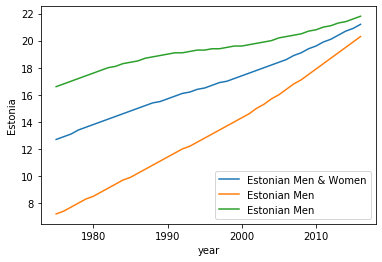

In [635]:
#Lineplot checking all genders in Estonia
sns.lineplot(data=df_both,y=df_both.Estonia,x=df_both.index,label="Estonian Men & Women")
sns.lineplot(data=df_male,y=df_male.Estonia,x=df_male.index,label="Estonian Men")
sns.lineplot(data=df_female,y=df_female.Estonia,x=df_female.index,label="Estonian Men")

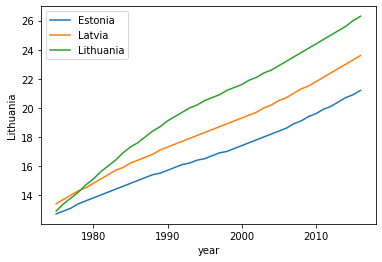

In [641]:
#Lineplot checking men in 
sns.lineplot(data=df_both,y=df_both.Estonia,x=df_both.index,label="Estonia")
sns.lineplot(data=df_both,y=df_both.Latvia,x=df_both.index,label="Latvia")
sns.lineplot(data=df_both,y=df_both.Lithuania,x=df_both.index,label="Lithuania")